In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from scipy.stats import ttest_ind

# I added the libraries from our assignments we can remove the ones we dont end up using later

NameError: name 'cm' is not defined

In [2]:
# Data Pre-Processing:
data = pd.read_csv('data.csv')   # this reads the dataset and stores it in data
data = data.drop(columns=['id', 'Unnamed: 32'])   # missing values removed here
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})   # this is one-hot encoding chnaging malignants to 1 and benigns to 0

print(data.isnull().sum())  # This proves our cleanup of missing values did work as intended

# Get top 5 features most correlated with diagnosis
top_features = data.corr()['diagnosis'].abs().sort_values(ascending=False)[1:6].index

# Thomas Geraci

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [3]:
print(data.head())
data.info()
data.describe()

# Thomas Geraci

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# Descriptive Statistics Diagrams

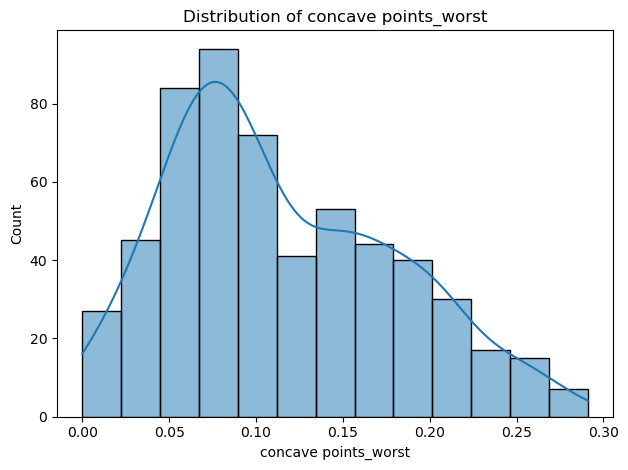

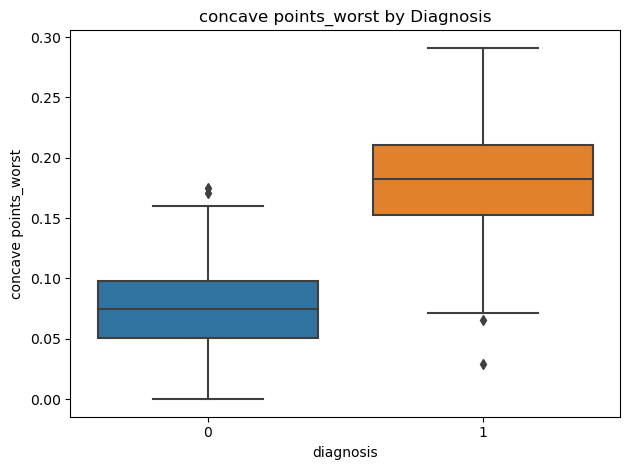

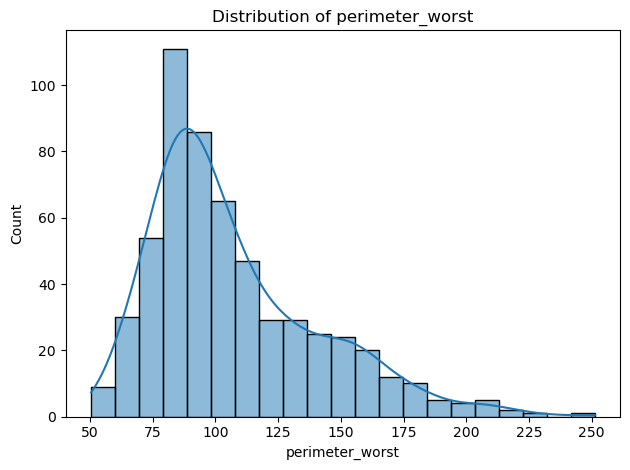

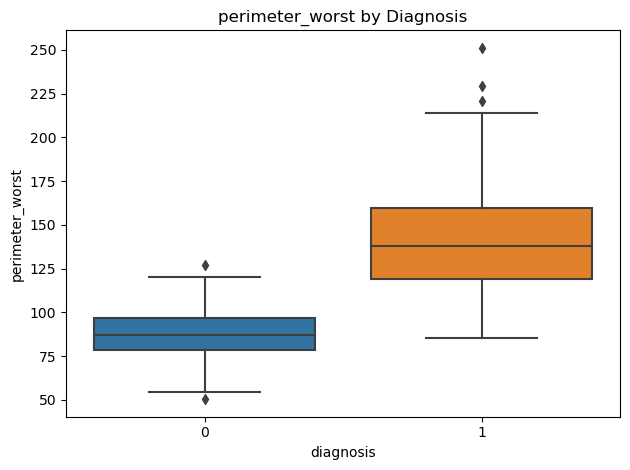

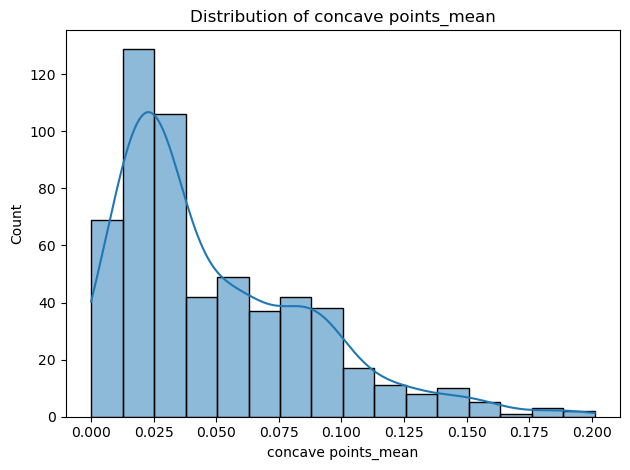

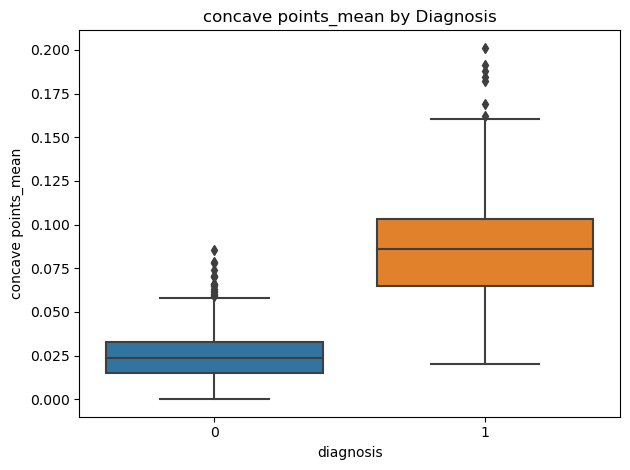

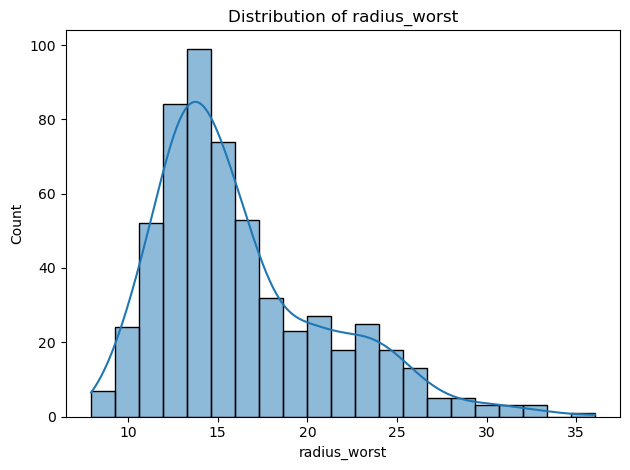

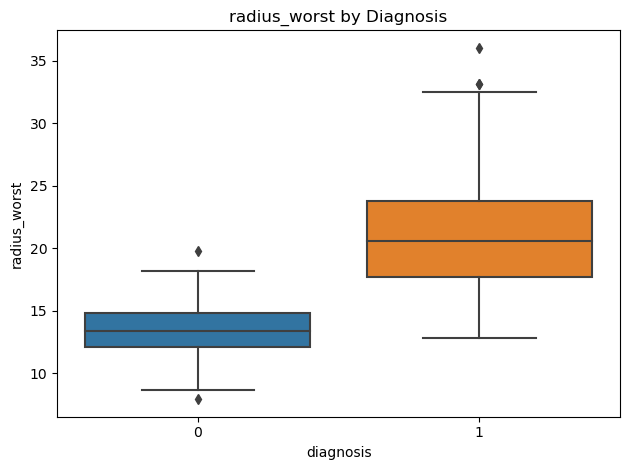

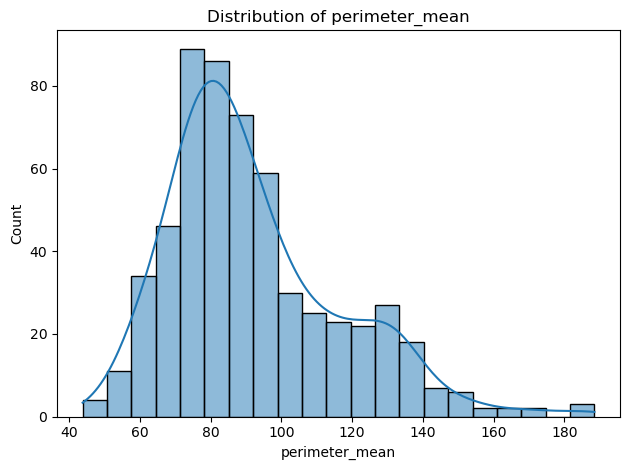

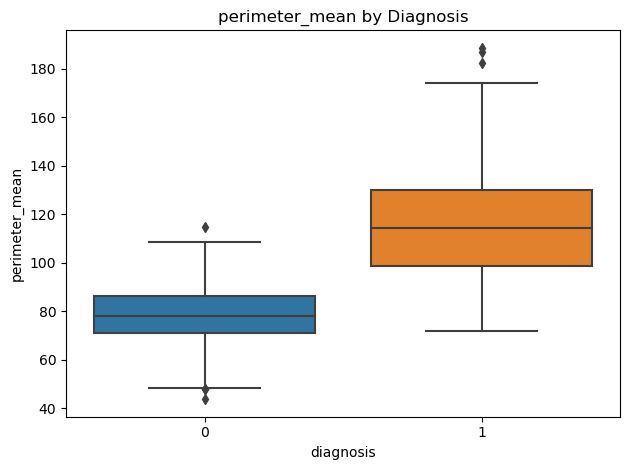

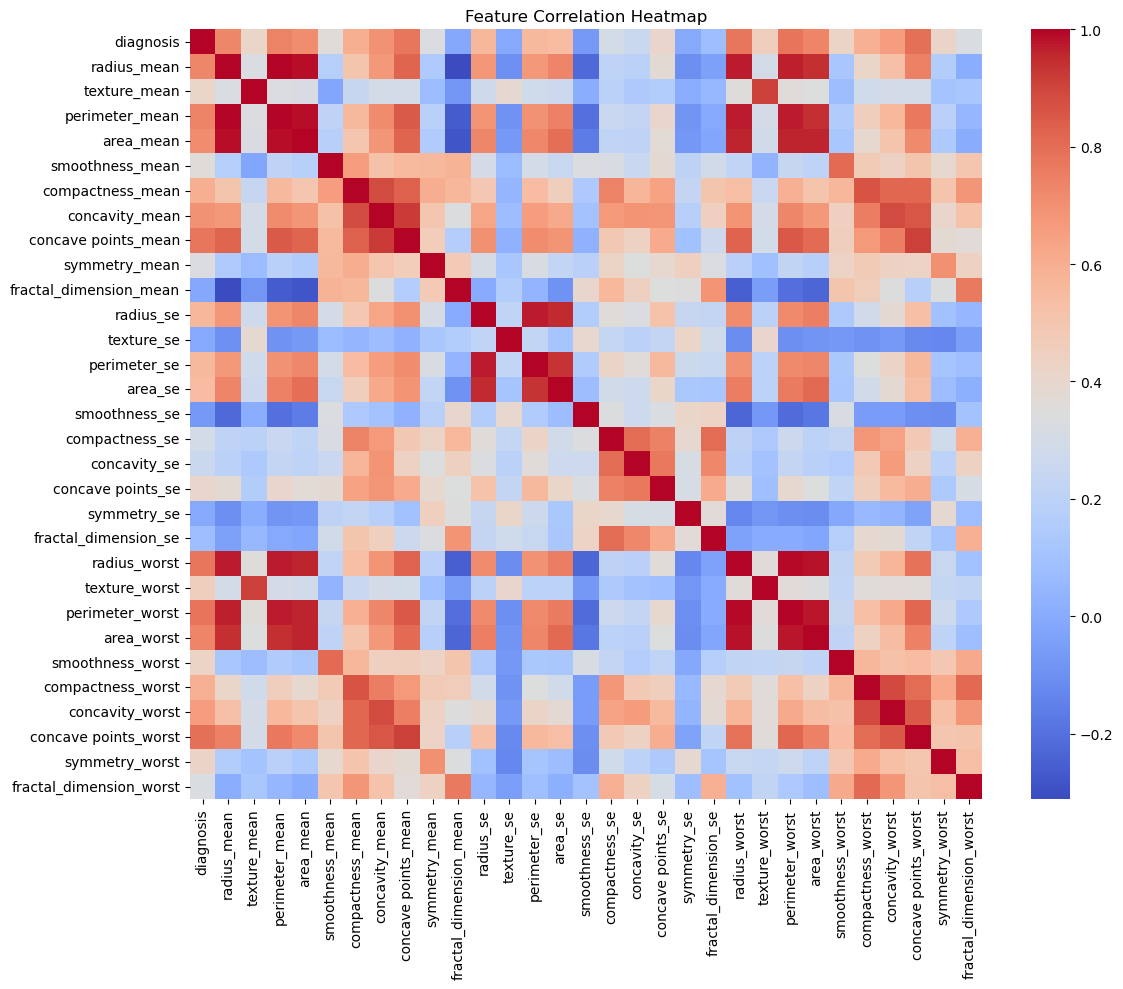

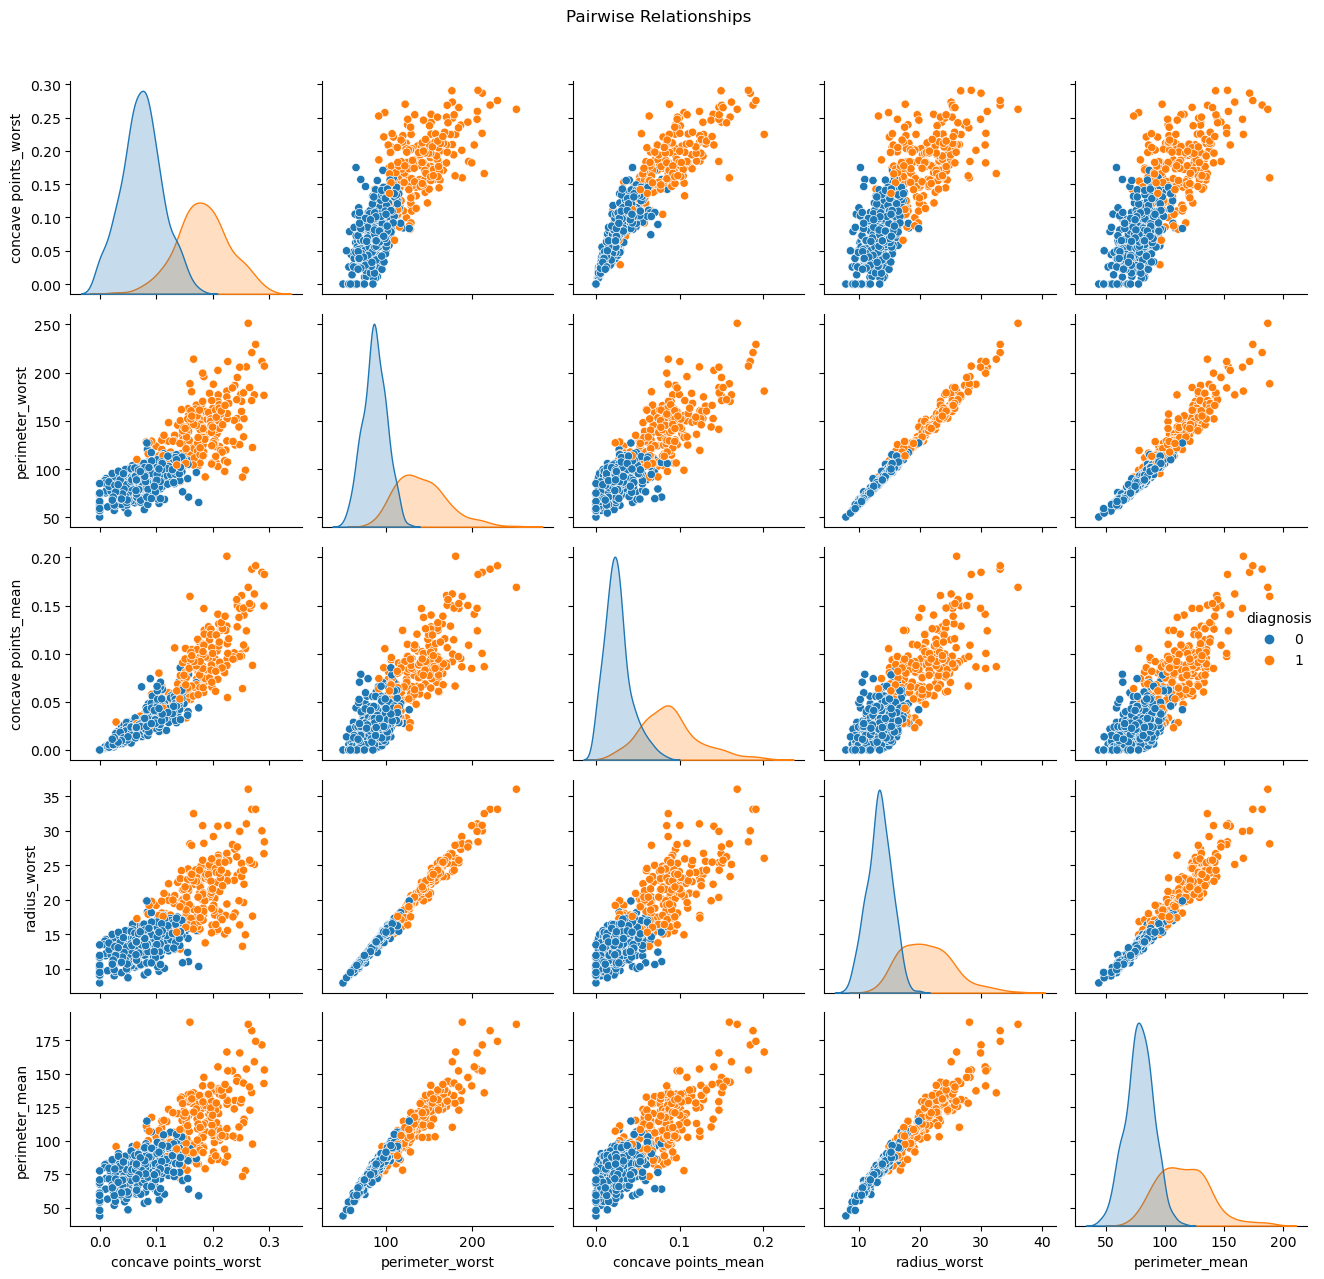

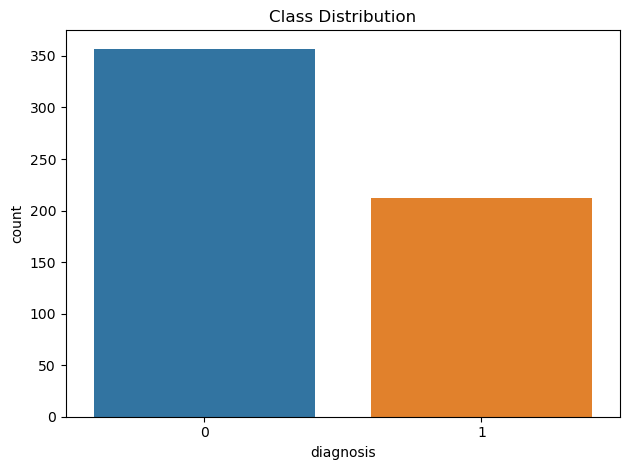

In [4]:
#Histogram, Boxplot, Correlation Heatmap, Pair plot, and Class Distribution. “Thomas Geraci”

#Histogram
def plot_histogram_v1(df, col):
    sns.histplot(df[col], kde=True) # Plots histogram with density curve
    plt.title(f'Distribution of {col}') # Adds plot title
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Boxplot
def plot_boxplot_v1(df, col, target='diagnosis'):
    sns.boxplot(x=target, y=col, data=df) # Draws boxplot grouped by class
    plt.title(f'{col} by {target.capitalize()}') # Title with capitalized target
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Correlation Heatmap 
def plot_correlation_heatmap_v1(df):
    plt.figure(figsize=(12, 10)) # Sets figure size
    sns.heatmap(df.corr(), cmap='coolwarm') # Draws heatmap with color mapping
    plt.title('Feature Correlation Heatmap') # Adds title
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Pairwise Scatterplots
def plot_pairwise_v1(df, columns, target='diagnosis'):
    sns.pairplot(data=df, vars=columns, hue=target) # Plots pairwise scatterplots
    plt.suptitle('Pairwise Relationships', y=1.02) # Adds title above figure
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Class Distribution
def plot_class_distribution_v1(df, target='diagnosis'):
    sns.countplot(x=target, data=df) # Counts of each class in target
    plt.title('Class Distribution') # Adds title
    plt.tight_layout() # Adjusts layout
    plt.show() # Displays plot

#Loops through each top feature and passes it to the histogram and boxplot functions
for col in top_features:
    plot_histogram_v1(data, col) # Histogram for each top feature
    plot_boxplot_v1(data, col) # Boxplot for each top feature

plot_correlation_heatmap_v1(data) # Heatmap of all correlations
plot_pairwise_v1(data, top_features) # Pairplot of top features
plot_class_distribution_v1(data) # Bar plot of diagnosis classes

# T-Test on Radius Mean

In [4]:
malignant = data[data['diagnosis'] == 1]['radius_mean'] # Here we get the people who are diagnosed as malignant and get their radius means
benign = data[data['diagnosis'] == 0]['radius_mean'] # Here we get the people who are diagnosed as benign and get their radius means
t_statistic, p_value = ttest_ind(malignant, benign, equal_var=False) # This is an independant two sample t test with first 2 parameters as our samples and the equal variance is false since we dont assume they have equal variances. This means we use welch's t test, which is more robust.
print(f"T-Statistic: {t_statistic:.3f}, P-Value: {p_value:.3f}") # This outputs the t score and p value

if p_value < 0.05:                                                  # This checks if our p value is under the confidence level 
    print("Significant difference in radius_mean between classes.") # if it is then we reject null hypothesis and there is a significant difference
else:
    print("No significant difference present.")                     # otherwise we fail to reject null hypothesis due to a lack of evidence

#Denis

T-Statistic: 22.209, P-Value: 0.000
Significant difference in radius_mean between classes.


# Splitting & Scaling the Data 

In [6]:
X = data.drop('diagnosis', axis=1) # Here we rmove the diagnosis column, so only the features are kept. This is because leaving diagnosis in would be like letting the model cheat and see the answers when predicting.
y = data['diagnosis'] # This sets y as the target variable, what we are trying to predict which is the diagnosis.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # this splits the dataset into training and test sets. 80% training and 20% test. Random state ensures reporducibility by using the same shuffle every time. 
scaler = StandardScaler() # this sets a standard scaler object for normalizing features
X_train_scaled = scaler.fit_transform(X_train) # this follows 3 main steps. In fit it calculates mean and sd of each feature based on training data to avoid leakage. Then in transform each feature in x_train is scaled to z=(x-mean)/sd. Then we get the result, x_train_scaled has a zero mean and unit variance accross each column.
X_test_scaled = scaler.transform(X_test) # since the mean and sd was calculated in the line before whilst fitting here we just use that to transform the test set the same way.

#Denis

# Model Creation

In [7]:
log_reg = LogisticRegression(max_iter=1000) # here we create a logistic regression model, max iterations = 1000 allows more iterations for the solver to converge.
log_reg.fit(X_train_scaled, y_train) # Here we train the model using the scaled training data, y_train provides correct outputs so the model can learn and adjust accordingly.
log_predictions = log_reg.predict(X_test_scaled) # here we make predictions using our model on the scaled test data.

ran_forest = RandomForestClassifier(random_state=42) # here we create a random forest model, random_state = 42 ensures reproducability of the tree building process
ran_forest.fit(X_train, y_train) # this trains the model using unscaled training data since random forest does not need scaling. y_train provides correct outputs so the model can learn and adjust accordingly.
ran_forest_predictions = ran_forest.predict(X_test) # then this makes predictions using our model on the test data.

#Denis

# Model Results

In [ ]:
print("Logistic Regression Results: ")
print(classification_report(y_test, log_predictions))         # Here the results of the logistic regression model are outputted. This result is a comparison of the correct predictions from the y_train and the results of our model's predicition.
print("Random Forest Results: ")
print(classification_report(y_test, ran_forest_predictions)) # Here the results of the random forrest model are outputted. This result is a comparison of the correct predictions from the y_train and the results of our model's predicition.

#Pros

Logistic Regression Results: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest Results: 
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



# Confusion Matrix Heatmap

Confusion matrix result fo Logistic Regression Model: 
[[70  1]
 [ 2 41]]
Confusion matrix result fo Random Forest Regression Model: 
[[70  1]
 [ 3 40]]


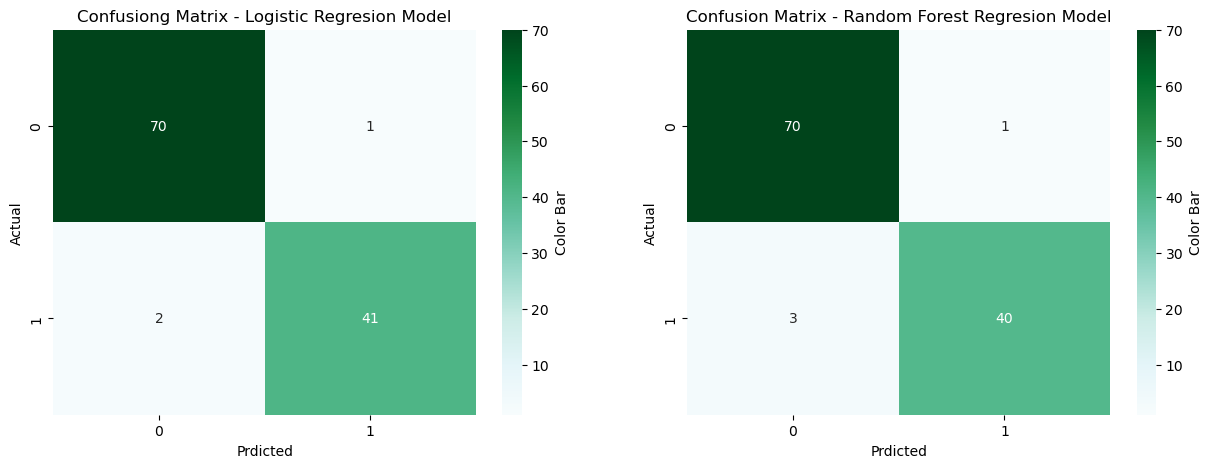

In [ ]:
conf_matrix_log = confusion_matrix(y_test, log_predictions, labels=[0,1])  # Generate confusion matrix for logistic regrssion model
conf_matrix_ran_forest = confusion_matrix(y_test, ran_forest_predictions, labels=[0,1]) # Generate confusion matrix for random forest regression model

print('Confusion matrix result fo Logistic Regression Model: ') # Print confusion matrix result for logistic regression model
print(conf_matrix_log)
print('Confusion matrix result fo Random Forest Regression Model: ') # Print confusion matrix result for random forest regression model
print(conf_matrix_ran_forest)

plt.figure(figsize=(15, 5)) # Set figure size

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_log, cmap="BuGn", annot=True, cbar_kws={"label":"Color Bar"}) # Generate and plot heatmap confusion matrix for logistics regression model
plt.title('Confusiong Matrix - Logistic Regresion Model')
plt.xlabel('Prdicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_ran_forest, cmap="BuGn", annot=True, cbar_kws={"label":"Color Bar"})  # Generate and plot heatmap confusion matrix for random forest regression model
plt.title('Confusion Matrix - Random Forest Regresion Model')
plt.xlabel('Prdicted')
plt.ylabel('Actual')
plt.show()